# COVID 19 effect on India

From the past one year, world is facing a tough situation with arise of a new virus called Covid-19.
As I am from India, in this notebook I analysed the data related to each state and union territory. I would to like to answer for the questions like which state has highest number of Confirmed cases, the top ten affected states with respect to fatality ratio and cured ratio.

# Data Preprocessing

* firstly import the libraries such as numpy and pandas to read the input .csv file and convert it to a dataframe.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-in-india/StatewiseTestingDetails.csv
/kaggle/input/covid19-in-india/covid_19_india.csv


In [2]:
df = pd.read_csv("../input/covid19-in-india/covid_19_india.csv")
print(df.head(10))

   Sno      Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  30/01/20  6:00 PM               Kerala                       1   
1    2  31/01/20  6:00 PM               Kerala                       1   
2    3  01/02/20  6:00 PM               Kerala                       2   
3    4  02/02/20  6:00 PM               Kerala                       3   
4    5  03/02/20  6:00 PM               Kerala                       3   
5    6  04/02/20  6:00 PM               Kerala                       3   
6    7  05/02/20  6:00 PM               Kerala                       3   
7    8  06/02/20  6:00 PM               Kerala                       3   
8    9  07/02/20  6:00 PM               Kerala                       3   
9   10  08/02/20  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                   

* The function info gives the information about the missing values for the each feature and also the datatype assigned to it.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9291 entries, 0 to 9290
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       9291 non-null   int64 
 1   Date                      9291 non-null   object
 2   Time                      9291 non-null   object
 3   State/UnionTerritory      9291 non-null   object
 4   ConfirmedIndianNational   9291 non-null   object
 5   ConfirmedForeignNational  9291 non-null   object
 6   Cured                     9291 non-null   int64 
 7   Deaths                    9291 non-null   int64 
 8   Confirmed                 9291 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 653.4+ KB


* Drop the unnecessary columns that you cannot use to make predictions.
* The columns namely Sno, Time, ConfirmedIndianNational, ConfirmedForeignNational are not much useful

In [4]:
df = df.drop(['Sno','Time','ConfirmedIndianNational', 'ConfirmedForeignNational'], axis=1)

In [5]:
df.isnull().sum()

Date                    0
State/UnionTerritory    0
Cured                   0
Deaths                  0
Confirmed               0
dtype: int64

In [6]:
df = df.rename(columns = {'State/UnionTerritory' : 'State'})

By using unique, you can find the duplicate entries. such that it is helpful in cleaning the data

In [7]:
df['State'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Telangana',
       'Telangana***', 'Telengana***', 'Maharashtra***', 'Chandigarh***',
       'Punjab***'], dtype=object)

In [8]:
df = df.replace('Telengana','Telangana')
df = df.replace('Telengana***','Telangana')
df = df.replace('Telangana***','Telangana')
df = df.replace('Maharashtra***','Maharashtra')
df = df.replace('Chandigarh***','Chandigarh')
df = df.replace('Punjab***','Punjab')

In [9]:
df['Active'] = df['Confirmed'] - df['Cured']

In [10]:
df.head(10)

,Date,State,Cured,Deaths,Confirmed,Active
0,30/01/20,Kerala,0,0,1,1
1,31/01/20,Kerala,0,0,1,1
2,01/02/20,Kerala,0,0,2,2
3,02/02/20,Kerala,0,0,3,3
4,03/02/20,Kerala,0,0,3,3
5,04/02/20,Kerala,0,0,3,3
6,05/02/20,Kerala,0,0,3,3
7,06/02/20,Kerala,0,0,3,3
8,07/02/20,Kerala,0,0,3,3
9,08/02/20,Kerala,0,0,3,3


In [11]:
state_cases = df.groupby('State')['Confirmed','Deaths','Cured', 'Active'].max().reset_index()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [12]:
#Sort by maximum Confirmed Cases
state_cases = state_cases.sort_values(by='Confirmed', ascending=False) 
state_cases.style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Blues', subset=["Active"])\
                        

,State,Confirmed,Deaths,Cured,Active
22,Maharashtra,1859367,47827,1737080,333486
18,Karnataka,895284,11880,858370,130839
1,Andhra Pradesh,872839,7042,860368,107721
32,Tamil Nadu,792788,11822,770378,61903
19,Kerala,644696,2472,582351,98826
11,Delhi,597112,9763,565039,51975
36,Uttar Pradesh,558173,7967,528832,73006
38,West Bengal,507995,8820,475425,43819
27,Odisha,321913,1784,316970,35844
30,Rajasthan,284116,2468,260773,31050


# Data Visualisation

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from the below graphs, we can conclude that the states Maharastra, Karnataka, Tamilnadu, Andhra pradesh  stood first four places respectively in all the three types of cases('Active', 'Confirmed', 'Death')

<AxesSubplot:xlabel='Active', ylabel='State'>

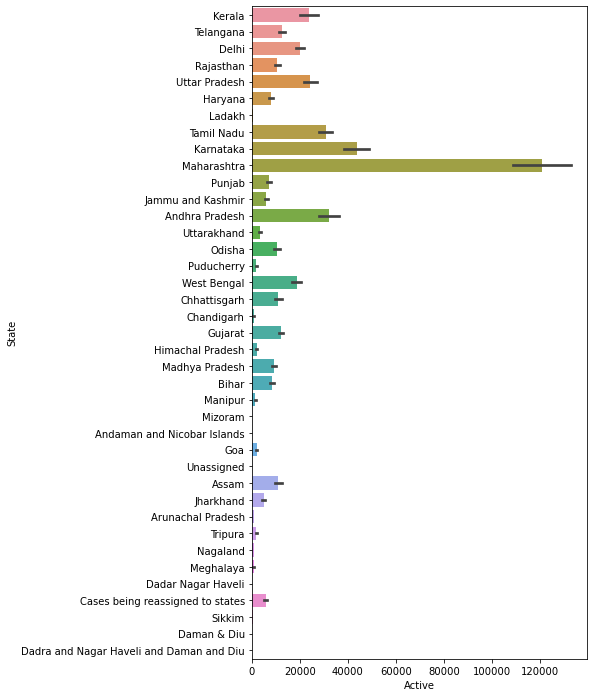

In [14]:
plt.figure(figsize= (6,12))
sns.barplot(x= 'Active', y = 'State',  data = df)

<AxesSubplot:xlabel='Confirmed', ylabel='State'>

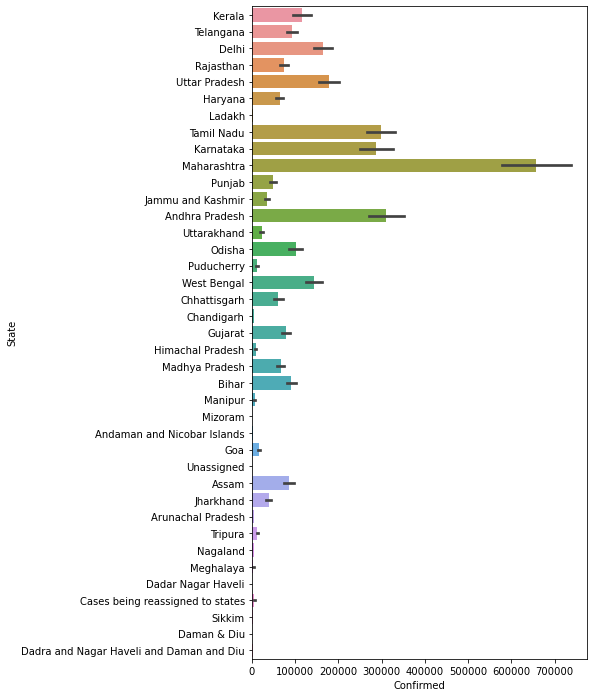

In [15]:
plt.figure(figsize= (6,12))
sns.barplot(x= 'Confirmed', y = 'State',  data = df)

* Here is the list of top ten effected states in India due to corona virus Pandemic.
    * fatality ratio – is the proportion of deaths from a certain disease compared to the total number of people diagnosed with the disease for a particular period.
    * Cure ratio = Cured cases / Confirmed Cases

In [16]:
df_topten = df.tail(35)
df_new = df_topten.sort_values(by='Confirmed', ascending=False).head(10)

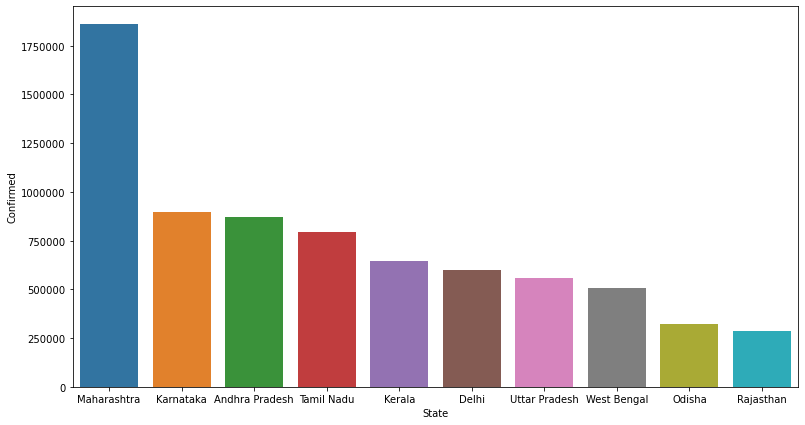

In [17]:
a4_dims = (13, 7)
fig, ax = plt.subplots(figsize=a4_dims)
barp = sns.barplot(data=df_new,x='State',y='Confirmed',ax=ax)
barp.set_yticklabels(labels=(barp.get_yticks()*1).astype(int))
plt.show()

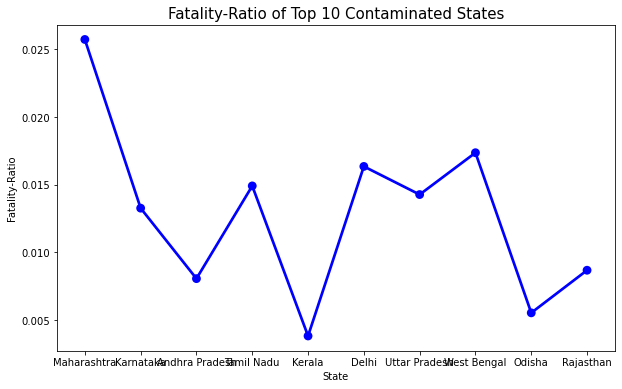

In [18]:
df_new['Fatality-Ratio'] = df_new['Deaths']/df_new['Confirmed']
a4_dims = (10, 6)
fig, ax = plt.subplots(figsize=a4_dims)
plt.title('Fatality-Ratio of Top 10 Contaminated States',size=15)
sns.pointplot(data=df_new,x='State',y='Fatality-Ratio',ax=ax,color='Blue')
plt.show()

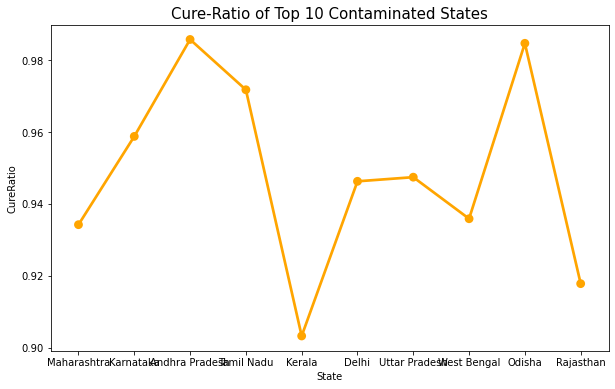

In [19]:
df_new['CureRatio'] = df_new['Cured']/df_new['Confirmed']
a4_dims = (10, 6)
fig, ax = plt.subplots(figsize=a4_dims)
plt.title('Cure-Ratio of Top 10 Contaminated States',size=15)
sns.pointplot(data=df_new,x='State',y='CureRatio',ax=ax,color='Orange')
plt.show()

In conclusion, from my analysis I would say Maharastra has highest number of infections and also all the southern states have more cases when compared to other states. Andhra Pradesh is in the first position of Cured ratio in top ten affected states(i.e., more patients are recovered). 